In [3]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, cross_val_predict, LeaveOneOut
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn import metrics
import matplotlib.pyplot as plt

import random
from datetime import datetime

import arff

In [4]:
solvent_data = pd.read_excel('/Users/jlisd/Downloads/AI Chem/AI Chem/Holistic prediction of enantioselectivity in asymmetric catalysis.Supplementary Data.xlsx', sheet_name = 'solvent')
solvent_data.set_index('solvent_name', inplace = True)
solvent_columns = list(solvent_data.columns)

In [5]:
nucleophile_data = pd.read_excel('/Users/jlisd/Downloads/AI Chem/AI Chem/Holistic prediction of enantioselectivity in asymmetric catalysis.Supplementary Data.xlsx', sheet_name = 'nucleophiles')
nucleophile_data.set_index('nucleophile_name', inplace = True)
nucleophile_columns = list(nucleophile_data.columns)

In [6]:
raw_catalyst_data = pd.read_excel('/Users/jlisd/Downloads/AI Chem/AI Chem/Holistic prediction of enantioselectivity in asymmetric catalysis.Supplementary Data.xlsx', sheet_name = 'full_catalyst')
raw_catalyst_data.rename(columns = {'last catalyst only S used': 'catalyst_name'}, inplace = True)

r_catalyst_data = raw_catalyst_data.copy()
for i in range(17):
    r_catalyst_data.iloc[i, 1] = r_catalyst_data.iloc[i, 1].replace('R/S', 'R')

s_catalyst_data = raw_catalyst_data.copy()
for i in range(17):
    s_catalyst_data.iloc[i, 1] = s_catalyst_data.iloc[i, 1].replace('R/S', 'S')

catalyst_data = pd.concat([r_catalyst_data, s_catalyst_data])
catalyst_data.set_index('catalyst_name', inplace = True)
catalyst_columns = list(catalyst_data.columns)

In [7]:
raw_catalyst_data = pd.read_excel('/Users/jlisd/Downloads/AI Chem/AI Chem/Holistic prediction of enantioselectivity in asymmetric catalysis.Supplementary Data.xlsx', sheet_name = 'full_catalyst')
raw_catalyst_data.rename(columns = {'last catalyst only S used': 'catalyst_name'}, inplace = True)

#Taking care of catalyst R/S
r_catalyst_data = raw_catalyst_data.copy()
for i in range(17):
    r_catalyst_data.iloc[i, 1] = r_catalyst_data.iloc[i, 1].replace('R/S', 'R')
    #print(r_catalyst_data.iloc[i, 1])
#r_catalyst_data.drop(17, inplace = True)    

s_catalyst_data = raw_catalyst_data.copy()
for i in range(17):
    s_catalyst_data.iloc[i, 1] = s_catalyst_data.iloc[i, 1].replace('R/S', 'S')
    #print(s_catalyst_data.iloc[i, 1])
    
catalyst_data = pd.concat([r_catalyst_data, s_catalyst_data])
catalyst_data.rename(columns = {'Unnamed: 1': 'catalyst_name'}, inplace = True)
catalyst_data.set_index('catalyst_name', inplace = True)

catalyst_columns = list(catalyst_data.columns)

catalyst_data

,Ar group,arhs,alhs,aavg,b,AREA(q),sin(AREA),Lwhole R,B1whole R,B5whole R,...,C3 A,C4 A,C5 A,C6 A,nPOsy,iPOsy,nPOas,iPOas,P,PNMR
catalyst_name,,,,,,,,,,,,,,,,,,,,,
"(R)-2,2'-Dihydroxy-3,3'-diphenyl-1,1'-binaphthalene cyclic phosphate",Ph,54.388,54.395,54.3915,56.388,70,0.773891,6.89,1.70,3.33,...,-0.23000,-0.22400,-0.21100,-0.186000,1085.06,364.3460,1306.55,271.6062,2.54600,266.5125
"(R)-3,3′-Bis(4-nitrophenyl)-1,1′-binaphthyl-2,2′-diyl hydrogenphosphate",4-NO2C6H4,52.789,52.801,52.7950,56.202,64,0.920026,8.28,1.70,3.34,...,-0.17700,0.01000,-0.19500,-0.207000,1086.44,320.2800,1310.44,295.3595,2.54500,266.1502
"(R)-3,3'-Bis[4-(2,4,6-trimethylphenyl)phenyl]-1,1'-binaphthyl-2,2'-diyl Hydrogen Phosphate","4-(2,4,6-MeC6H2)C6H4",53.962,53.963,53.9625,56.355,38,0.296369,12.27,2.97,4.61,...,-0.20700,-0.05300,-0.22300,-0.199000,1085.55,356.6200,1306.58,242.2277,2.54600,266.3224
"(R)-3,3′-Bis(4-chlorophenyl)-1,1′-binaphthyl-2,2′-diyl hydrogenphosphate",4-ClC6H4,53.704,53.718,53.7110,56.219,67,-0.855520,8.21,1.70,3.33,...,-0.23200,-0.03000,-0.25000,-0.190000,1085.19,338.5586,1306.11,286.4410,2.54600,266.1394
"(R)-3,3'-Bis(4-diphenyl)-1,1'-binaphthyl 2,2'-diyl hydrogenphosphate",4-PhC6H4,42.215,52.094,47.1545,55.769,50,-0.262375,11.22,2.01,3.50,...,-0.19550,-0.06650,-0.20200,-0.183500,1087.44,332.8368,1317.37,222.6765,2.53900,268.1404
"(R)-3,3′-Bis(4-trifluoromethylphenyl)-1,1′-binaphthyl-2,2′-diyl hydrogenphosphate",4-CF3C6H4,53.619,53.627,53.6230,56.229,56,-0.521551,8.28,1.83,3.34,...,-0.19300,-0.17200,-0.17700,-0.184000,1086.23,355.7629,1307.21,397.3333,2.54500,266.1523
"(R)-3,3′-Bis(3,5-dinitrolphenyl)-1,1′-binaphthyl-2,2′-diyl hydrogenphosphate","3,5-NO2C6H3",59.563,59.562,59.5625,55.628,66,-0.026551,7.58,1.70,5.12,...,0.02900,-0.17300,0.01300,-0.154000,1087.41,296.0611,1317.62,300.6142,2.54300,266.2896
"(R)-3,3'-Bis(3,5-diphenyl)phenyl-1,1'-binaphthyl-2,2'-diyl Hydrogen Phosphate","3,5-PhC6H3",42.585,60.259,51.4220,54.746,36,-0.991779,8.59,2.59,7.06,...,-0.04700,-0.18750,-0.05650,-0.171500,1085.98,366.5389,1310.24,248.6693,2.54800,269.8459
"(R)-3,3′-Bis[3,5-bis(trifluoromethyl)phenyl]-1,1′-binaphthyl-2,2′-diyl hydrogenphosphate","3,5-(CF3)2-C6H3",55.665,55.883,55.7740,56.229,62,-0.739181,7.44,2.39,5.06,...,-0.14850,-0.16150,-0.16650,-0.157000,1086.10,320.0554,1312.33,202.3039,2.54400,266.3457


In [8]:
iminium_data = pd.read_excel('/Users/jlisd/Downloads/AI Chem/AI Chem/Holistic prediction of enantioselectivity in asymmetric catalysis.Supplementary Data.xlsx', sheet_name = 'iminiums')
iminium_data.rename(columns = {'imine': 'iminium_name', 'electronic energy difference (kcal/mol) ': 'electronic energy difference (kcal/mol)'}, inplace = True)
#removed space at the end of electronic energy
iminium_data.set_index('iminium_name', inplace = True)
iminium_data.drop(labels = ['Unnamed: 1'], axis = 1, inplace = True)
for i in range(1, 181):
    z_iminium_name = '(Z)-Iminium ' + str(i)
    e_iminium_name = '(E)-Iminium ' + str(i)
    iminium_data.loc[z_iminium_name, 'electronic energy difference (kcal/mol)'] = iminium_data.loc[e_iminium_name, 'electronic energy difference (kcal/mol)']
iminium_columns = list(iminium_data.columns)

In [9]:
iminium_data.head()

,nNH,i NH,N,H (iminium),C,SubL,SubS,PG,PGL,PGB1,...,SL,SB1,SB5,LL,LB1,LB5,HOMO (iminium),LUMO (iminium),Polarizability (iminium),electronic energy difference (kcal/mol)
iminium_name,,,,,,,,,,,,,,,,,,,,,
(E)-Iminium 1,3474.83,97.5295,-0.426,0.442,0.487,-0.464,-0.697,0.030,8.85,1.76,...,3.59,1.7,2.12,4.61,1.7,7.04,-0.40205,-0.17518,201.89,1.62
(Z)-Iminium 1,3491.05,82.0336,-0.430,0.424,0.526,-0.488,-0.687,0.017,8.84,1.77,...,3.59,1.7,2.13,4.77,1.7,7.17,-0.40330,-0.17332,193.50,1.62
(E)-Iminium 2,3400.90,359.5285,-0.447,0.457,0.477,-0.466,-0.690,0.031,8.81,1.75,...,3.59,1.7,2.12,4.76,1.7,5.63,-0.40541,-0.17578,164.07,1.86
(Z)-Iminium 2,3494.88,82.0612,-0.438,0.425,0.523,-0.503,-0.689,0.022,8.85,1.76,...,3.59,1.7,2.13,4.66,1.7,5.07,-0.40963,-0.17836,160.51,1.86
(E)-Iminium 3,3196.55,910.2524,-0.419,0.469,0.420,-0.140,-0.690,0.032,8.79,1.74,...,3.59,1.7,2.12,7.09,1.7,7.45,-0.40169,-0.18157,220.26,0.69


In [10]:
class Reaction():
    
    def __init__(self, name, entry, catalyst, nucleophile, substrate, solvent, iminium_type, iminium, majorenantiomer, minorenantiomer, ee, G):
        self.name = name
        self.entry = entry
        self.catalyst = catalyst
        self.nucleophile = nucleophile
        self.substrate = substrate
        self.solvent = solvent
        self.iminium_type = iminium_type
        self.iminium = iminium
        self.majorenantiomer = majorenantiomer
        self.minorenantiomer = minorenantiomer
        self.ee = ee
        self.G = G
            
        self.solvent_properties = dict()
        for column in solvent_columns:
            self.solvent_properties[column] = solvent_data.loc[solvent, column]
            
        self.catalyst_properties = dict()
        for column in catalyst_columns:
            self.catalyst_properties[column] = catalyst_data.loc[catalyst, column]
            
        self.nucleophile_properties = dict()
        for column in nucleophile_columns:
            self.nucleophile_properties[column] = nucleophile_data.loc[nucleophile, column]
        
        self.e_iminium = '(E)-' + str(iminium)
        self.z_iminium = '(Z)-' + str(iminium)
        
        self.e_iminium_properties = dict()
        self.z_iminium_properties = dict()
        for column in iminium_columns:
            self.e_iminium_properties[column] = iminium_data.loc[self.e_iminium, column]
            self.z_iminium_properties[column] = iminium_data.loc[self.z_iminium, column]
            
        
            
    def __repr__(self):
        return "Reaction - {}".format(self.name)
        #iminium stuff

In [11]:
reactions = dict()

def process_data(reaction_number, reaction, iminium_type, sheetname = None):
    reaction_file = '/Users/jlisd/Downloads/AI Chem/AI Chem/reaction info 5-23/' + str(reaction_number) + ' ' + reaction + '.xlsx'
    if sheetname == None:
        data = pd.read_excel(reaction_file)
    else:
        data = pd.read_excel(reaction_file, sheet_name = sheetname)
        
    data.set_index('entry', inplace = True)
    
    entries = len(data)
    for entry in range(1, entries + 1):
        if sheetname == None:
            reaction_name = reaction + ' ' + str(entry)
        else:
            reaction_name = reaction + ' ' + sheetname + ' ' + str(entry)
        
        
        reactions[reaction_name] = Reaction(reaction_name, 
                                            entry,
                                            data.loc[entry, 'Catalyst'],
                                            data.loc[entry, 'Nucleophile'],
                                            data.loc[entry, 'Substrate'],
                                            data.loc[entry, 'Solvent'],
                                            iminium_type,
                                            data.loc[entry, 'Iminium'],
                                            data.loc[entry, 'Major Enantiomer'],
                                            data.loc[entry, 'Minor Enantiomer'],
                                            data.loc[entry, 'ee'],
                                            data.loc[entry, 'ΔΔG‡'])
        


In [12]:
process_data(1, 'Addition of Alcohols', 'E', 'Scope')
process_data(2, 'Addition of thiols', 'E', 'Catalyst & solvent screening da')
process_data(2, 'Addition of thiols', 'E', 'Effect of catalyst loading')
process_data(2, 'Addition of thiols', 'E', 'Imine scope')
process_data(2, 'Addition of thiols', 'E', 'Thiol scope')
process_data(3, 'Hydrophosphonylation of imines', 'E', 'Catalyst screening data')
process_data(3, 'Hydrophosphonylation of imines', 'E', 'Scope')
process_data(4, 'Addition of diazomethylphosphonates', 'E', "Optimization of catalyst and re")
process_data(4, 'Addition of diazomethylphosphonates', 'E', "Imine scope")
process_data(5, 'Addition of diazoacetamides', 'E', 'Catalyst screening data')
process_data(5, 'Addition of diazoacetamides', 'E', 'Solvent screening data')
process_data(5, 'Addition of diazoacetamides', 'E', 'Substrate(s) scope')
process_data(6, 'Strecker Reaction (with aldimines)', 'E', 'Catalyst screening data')
process_data(6, 'Strecker Reaction (with aldimines)', 'E', 'Solvent screening data')
process_data(6, 'Strecker Reaction (with aldimines)', 'E', 'Imine scope')
process_data(7, 'Peroxidation of imines', 'E', 'Catalyst screening data')
process_data(7, 'Peroxidation of imines', 'E', 'Solvent screening data')
process_data(7, 'Peroxidation of imines', 'E', 'Substrate(s) scope')
process_data(8, 'Transfer Hydrogenation of b,g-Alkynyl a-Imino Esters', 'E', 'Catalyst screening and reaction')
process_data(8, 'Transfer Hydrogenation of b,g-Alkynyl a-Imino Esters', 'E', 'Scope')
process_data(9, 'Transfer Hydrogenation of Enamides', 'E', 'Scope')
process_data(10, 'Transfer Hydrogenation of N-aryl imines (List)', 'Z', 'Catalyst screening data')
process_data(10, 'Transfer Hydrogenation of N-aryl imines (List)', 'Z', 'Imine scope')
process_data(11, 'Transfer Hydrogenation of N-aryl imines (Rueping)', 'Z', 'Catalyst screening data')
process_data(11, 'Transfer Hydrogenation of N-aryl imines (Rueping)', 'Z', 'Solvent screening data')
process_data(11, 'Transfer Hydrogenation of N-aryl imines (Rueping)', 'Z', 'Imine scope')
process_data(12, 'Reductive amination of N-aryl imines (Macmillan)', 'Z', 'Reaction optimization')
process_data(13, 'Transfer Hydrogenation of trifluoromethyl ketimines', 'Z', 'Benzothiazoline screening data')
process_data(13, 'Transfer Hydrogenation of trifluoromethyl ketimines', 'Z', 'Imine scope')
process_data(14, 'Transfer Hydrogenation of N-aryl imines by benzothiazoline', 'Z', 'Catalyst screening data')
process_data(14, 'Transfer Hydrogenation of N-aryl imines by benzothiazoline', 'Z', 'Benzothiazoline screening data')
process_data(14, 'Transfer Hydrogenation of N-aryl imines by benzothiazoline', 'Z', 'Imine scope')
process_data(15, 'Reductive amination of aliphatic ketones by benzothiazoline', 'Z', 'Catalyst screening data')
process_data(15, 'Reductive amination of aliphatic ketones by benzothiazoline', 'Z', 'Imine scope')
process_data(16, 'Transfer Hydrogenation of ethyl ketimines', 'Z', 'Benzothiazoline screening data')
process_data(16, 'Transfer Hydrogenation of ethyl ketimines', 'Z', 'Scope 1 benzothiazoline')
process_data(16, 'Transfer Hydrogenation of ethyl ketimines', 'Z', 'Scope 2 dihydropyridine')
process_data(17, 'Strecker Reaction (with ketimines)', 'Z', 'Catalyst screening data')
process_data(17, 'Strecker Reaction (with ketimines)', 'Z', 'Solvent data')
process_data(17, 'Strecker Reaction (with ketimines)', 'Z', 'Imine scope')
#process_data(18, 'Addition of enecarbamates to benzoyl imines')
#process_data(19, 'Hydrogenation of fluorinated alkynyl ketimines')
#process_data(20, 'Addition of thiols to imines (Denmark)')

In [13]:
print(len(reactions))

381


In [14]:
catalyst = pd.DataFrame(columns = ['Reaction'] + catalyst_columns)
catalyst.set_index('Reaction', inplace = True)

for reaction in reactions:
    for column in catalyst_columns:
        catalyst.loc[reaction, column] = reactions[reaction].catalyst_properties[column]
        
#first column is numerical

In [15]:
catalyst.head()

,Ar group,arhs,alhs,aavg,b,AREA(q),sin(AREA),Lwhole R,B1whole R,B5whole R,...,C3 A,C4 A,C5 A,C6 A,nPOsy,iPOsy,nPOas,iPOas,P,PNMR
Reaction,,,,,,,,,,,,,,,,,,,,,
Addition of Alcohols Scope 1,9-Anthryl,78.854,78.853,78.8535,55.161,61,-0.966118,6.94,1.73,5.72,...,-0.054,-0.162,-0.059,-0.049,1088.24,321.983,1324.49,223.989,2.539,268.953
Addition of Alcohols Scope 2,9-Anthryl,78.854,78.853,78.8535,55.161,61,-0.966118,6.94,1.73,5.72,...,-0.054,-0.162,-0.059,-0.049,1088.24,321.983,1324.49,223.989,2.539,268.953
Addition of Alcohols Scope 3,9-Anthryl,78.854,78.853,78.8535,55.161,61,-0.966118,6.94,1.73,5.72,...,-0.054,-0.162,-0.059,-0.049,1088.24,321.983,1324.49,223.989,2.539,268.953
Addition of Alcohols Scope 4,9-Anthryl,78.854,78.853,78.8535,55.161,61,-0.966118,6.94,1.73,5.72,...,-0.054,-0.162,-0.059,-0.049,1088.24,321.983,1324.49,223.989,2.539,268.953
Addition of Alcohols Scope 5,9-Anthryl,78.854,78.853,78.8535,55.161,61,-0.966118,6.94,1.73,5.72,...,-0.054,-0.162,-0.059,-0.049,1088.24,321.983,1324.49,223.989,2.539,268.953


In [16]:
nucleophile = pd.DataFrame(columns = ['Reaction'] + nucleophile_columns)
nucleophile.set_index('Reaction', inplace = True)

for reaction in reactions:
    for column in nucleophile_columns:
        nucleophile.loc[reaction, column] = reactions[reaction].nucleophile_properties[column]
        
#first column is numerical

In [17]:
nucleophile.head()

,nucleophile,H (nucleophile),X,Nu,nXH,iXH,HOMO (nucleophile),LUMO (nucleophile),Polarizability (nucleophile),L,B1,B5,bond distance H-X,H-X-Nu,H-X-CNu
Reaction,,,,,,,,,,,,,,,
Addition of Alcohols Scope 1,methanol,0.458,-0.707,-0.707,3899.4,40.1897,-0.35328,0.0626,18.27,3.99,1.4,3.17,0.96,180,180
Addition of Alcohols Scope 2,ethanol,0.464,-0.717,-0.717,3893.54,39.6036,-0.34808,0.06264,30.23,5.03,1.2,3.41,0.96,180,180
Addition of Alcohols Scope 3,isopropanol,0.461,-0.717,-0.717,3877.1,28.7764,-0.34588,0.05777,42.01,5.03,1.13,4.45,0.96,180,180
Addition of Alcohols Scope 4,tert-butanol,0.459,-0.722,-0.722,3859.15,22.2253,-0.34415,0.05141,53.61,5.03,1.44,4.44,0.96,180,180
Addition of Alcohols Scope 5,2-chloroethanol,0.471,-0.704,-0.704,3851.9,43.4805,-0.3582,0.05955,40.75,3.98,1.4,4.44,0.96,180,180


In [18]:
solvent = pd.DataFrame(columns = ['Reaction'] + solvent_columns)
solvent.set_index('Reaction', inplace = True)

for reaction in reactions:
    for column in solvent_columns:
        solvent.loc[reaction, column] = reactions[reaction].solvent_properties[column]
        
#first column is numerical

In [19]:
solvent.head()

,solvent,First Zagreb,First Zagreb index by valence vertex degrees,Second Zagreb,Second Zagreb index by valence vertex degrees,Polarity,Narumi Simple Topological,Narumi Harmonic Topological,Narumi Geometric Topological,Total structure connectivity,...,CLOGP,MR,CMR,RMM,Density,no. of H bond donor,no. H bond acceptor,Polarizability (solvent),HOMO (solvent),LUMO (solvent)
Reaction,,,,,,,,,,,,,,,,,,,,,
Addition of Alcohols Scope 1,ethyl acetate,20,94,18,66,3,2.485,1.385,1.513,0.289,...,0.711,22.2,2.2214,88.11,0.902,0,2,54.4,-0.35344,0.05588
Addition of Alcohols Scope 2,ethyl acetate,20,94,18,66,3,2.485,1.385,1.513,0.289,...,0.711,22.2,2.2214,88.11,0.902,0,2,54.4,-0.35344,0.05588
Addition of Alcohols Scope 3,ethyl acetate,20,94,18,66,3,2.485,1.385,1.513,0.289,...,0.711,22.2,2.2214,88.11,0.902,0,2,54.4,-0.35344,0.05588
Addition of Alcohols Scope 4,ethyl acetate,20,94,18,66,3,2.485,1.385,1.513,0.289,...,0.711,22.2,2.2214,88.11,0.902,0,2,54.4,-0.35344,0.05588
Addition of Alcohols Scope 5,ethyl acetate,20,94,18,66,3,2.485,1.385,1.513,0.289,...,0.711,22.2,2.2214,88.11,0.902,0,2,54.4,-0.35344,0.05588


In [20]:
iminium = pd.DataFrame(columns = ['Reaction', "iminium_type"] + iminium_columns)
iminium.set_index('Reaction', inplace = True)

for reaction in reactions:
    if reactions[reaction].iminium_type == 'E':
        iminium.loc[reaction, "iminium_type"] = 'E'
        for column in iminium_columns:
            iminium.loc[reaction, column] = reactions[reaction].e_iminium_properties[column]
    elif reactions[reaction].iminium_type == 'Z':
        iminium.loc[reaction, "iminium_type"] = 'Z'
        for column in iminium_columns:
            iminium.loc[reaction, column] = reactions[reaction].z_iminium_properties[column]

            

In [21]:
iminium.head()

,iminium_type,nNH,i NH,N,H (iminium),C,SubL,SubS,PG,PGL,...,SL,SB1,SB5,LL,LB1,LB5,HOMO (iminium),LUMO (iminium),Polarizability (iminium),electronic energy difference (kcal/mol)
Reaction,,,,,,,,,,,,,,,,,,,,,
Addition of Alcohols Scope 1,E,3569.31,83.7481,-0.533,0.427,0.306,-0.2,0.255,0.69,6.63,...,2.58,1.09,1.09,6.76,1.7,3.39,-0.44273,-0.23633,180.99,6.67
Addition of Alcohols Scope 2,E,3569.31,83.7481,-0.533,0.427,0.306,-0.2,0.255,0.69,6.63,...,2.58,1.09,1.09,6.76,1.7,3.39,-0.44273,-0.23633,180.99,6.67
Addition of Alcohols Scope 3,E,3569.31,83.7481,-0.533,0.427,0.306,-0.2,0.255,0.69,6.63,...,2.58,1.09,1.09,6.76,1.7,3.39,-0.44273,-0.23633,180.99,6.67
Addition of Alcohols Scope 4,E,3569.31,83.7481,-0.533,0.427,0.306,-0.2,0.255,0.69,6.63,...,2.58,1.09,1.09,6.76,1.7,3.39,-0.44273,-0.23633,180.99,6.67
Addition of Alcohols Scope 5,E,3569.31,83.7481,-0.533,0.427,0.306,-0.2,0.255,0.69,6.63,...,2.58,1.09,1.09,6.76,1.7,3.39,-0.44273,-0.23633,180.99,6.67


In [22]:
ee = pd.DataFrame(columns = ['Reaction', 'ee'])
ee.set_index('Reaction', inplace = True)

for reaction in reactions:
    ee.loc[reaction, 'ee'] = reactions[reaction].ee

In [23]:
Y = pd.DataFrame(columns = ['Reaction', 'ΔΔG‡'])
Y.set_index('Reaction', inplace = True)

for reaction in reactions:
    Y.loc[reaction, 'ΔΔG‡'] = reactions[reaction].G
    

In [24]:
print(catalyst.shape, nucleophile.shape, solvent.shape, iminium.shape, ee.shape)

(381, 85) (381, 15) (381, 160) (381, 22) (381, 1)


In [25]:
X_iminium = pd.concat([catalyst.drop(['Ar group'], axis = 1), 
               nucleophile.drop(['nucleophile'], axis = 1), 
               solvent.drop(['solvent'], axis = 1), 
               iminium.drop(['iminium_type'], axis = 1)], axis = 1)
X_iminium.shape

(381, 278)

In [26]:
#no iminium features
X_no_iminium = pd.concat([catalyst.drop(['Ar group'], axis = 1), 
               nucleophile.drop(['nucleophile'], axis = 1), 
               solvent.drop(['solvent'], axis = 1)], axis = 1)
X_no_iminium.shape

(381, 257)

In [27]:
for reaction in reactions:
    if iminium.loc[reaction, 'iminium_type'] == 'Z':
        Y.loc[reaction, 'ΔΔG‡'] = Y.loc[reaction, 'ΔΔG‡'] * (-1)

###############################################################################################################################

Import Files

###############################################################################################################################

In [28]:
Y_is = pd.read_excel('Y_is.xlsx').set_index('Reaction')
Y_oos = pd.read_excel('Y_oos.xlsx').set_index('Reaction')

In [29]:
#iminium + nucleophile
X_total_is_scaled = pd.read_excel('X (all features, IS, scaled).xlsx').set_index('Reaction')
X_total_oos_scaled = pd.read_excel('X (all features, OOS, scaled).xlsx').set_index('Reaction')

In [30]:
#nucleophile
X_nuc_is_scaled = pd.read_excel('X (nucleophile, IS, scaled).xlsx').set_index('Reaction')
X_nuc_oos_scaled = pd.read_excel('X (nucleophile, OOS, scaled).xlsx').set_index('Reaction')

In [31]:
#iminium
X_imi_is_scaled = pd.read_excel('X (iminium, IS, scaled).xlsx').set_index('Reaction')
X_imi_oos_scaled = pd.read_excel('X (iminium, OOS, scaled).xlsx').set_index('Reaction')

###############################################################################################################################

End of Data Processing

###############################################################################################################################

In [32]:
random_state = random.seed(datetime.now())
test_size = 0.5
X = X_total_is_scaled

In [33]:
X1 = X.iloc[0:20, :]
X2 = X.iloc[20:54, :]
X3 = X.iloc[54:70, :]
X4 = X.iloc[70:109, :]
X5 = X.iloc[109:138, :]
X6 = X.iloc[138:165, :]
X7 = X.iloc[165:191, :]
X8 = X.iloc[191:212, :]
X9 = X.iloc[212:222, :]
X10 = X.iloc[222:239, :]
X11 = X.iloc[239:263, :]
X12 = X.iloc[263:267, :]
X13 = X.iloc[267:281, :]
X14 = X.iloc[281:305, :]
X15 = X.iloc[305:323, :]
X16 = X.iloc[323:362, :]
X17 = X.iloc[362:381, :]

Xs = [X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, X16, X17]

In [34]:
Y1 = Y.iloc[0:20, :]
Y2 = Y.iloc[20:54, :]
Y3 = Y.iloc[54:70, :]
Y4 = Y.iloc[70:109, :]
Y5 = Y.iloc[109:138, :]
Y6 = Y.iloc[138:165, :]
Y7 = Y.iloc[165:191, :]
Y8 = Y.iloc[191:212, :]
Y9 = Y.iloc[212:222, :]
Y10 = Y.iloc[222:239, :]
Y11 = Y.iloc[239:263, :]
Y12 = Y.iloc[263:267, :]
Y13 = Y.iloc[267:281, :]
Y14 = Y.iloc[281:305, :]
Y15 = Y.iloc[305:323, :]
Y16 = Y.iloc[323:362, :]
Y17 = Y.iloc[362:381, :]

Ys = [Y1, Y2, Y3, Y4, Y5, Y6, Y7, Y8, Y9, Y10, Y11, Y12, Y13, Y14, Y15, Y16, Y17]

In [35]:
reaction1 = list(X.index)[0:20]
reaction2 = list(X.index)[20:54]
reaction3 = list(X.index)[54:70]
reaction4 = list(X.index)[70:109]
reaction5 = list(X.index)[109:138]
reaction6 = list(X.index)[138:165]
reaction7 = list(X.index)[165:191]
reaction8 = list(X.index)[191:212]
reaction9 = list(X.index)[212:222]
reaction10 = list(X.index)[222:239]
reaction11 = list(X.index)[239:263]
reaction12 = list(X.index)[263:267]
reaction13 = list(X.index)[267:281]
reaction14 = list(X.index)[281:305]
reaction15 = list(X.index)[305:323]
reaction16 = list(X.index)[323:362]
reaction17 = list(X.index)[362:381]

reactions = [reaction1, reaction2, reaction3, reaction4, reaction5, reaction6, reaction7, reaction8, reaction9, reaction10, reaction11, reaction12, reaction13, reaction14, reaction15, reaction16, reaction17]

In [36]:
X_reaction = X8
Y_reaction = Y8
Drop = reaction8

In [135]:
def LORO_RF():
    scores = pd.DataFrame(columns = ['set', 'MSE', 'MAE', 'r^2'])
    feature_tables = dict()
    for i in range(17): 

        forest = RandomForestRegressor()

        Drop = reactions[i]

        X_train = X.drop(Drop)
        Y_train = Y.drop(Drop)
        X_test = Xs[i]
        Y_test = Ys[i]

        forest.fit(X_train.reset_index().drop(['Reaction'], axis = 1), Y_train.reset_index().drop('Reaction', axis = 1).values.ravel())
        Y_pred = forest.predict(X_test.reset_index().drop(['Reaction'], axis = 1))

        results = pd.concat([Y_test.reset_index(), pd.DataFrame(Y_pred)], axis = 1)
        results.set_index('Reaction', inplace = True)
        results.columns = ['Actual', 'Predicted']
        
    
        scores = scores.append({'set': str(i+1),
                    'MSE': mean_squared_error(Y_test, Y_pred),
                    'MAE': mean_absolute_error(Y_test, Y_pred),
                    'r^2': r2_score(Y_test, Y_pred)}, ignore_index = True)

    scores.set_index('set', inplace = True)

    return total_results, scores

In [136]:
total_results, scores = LORO_RF()

In [137]:
scores

,MSE,MAE,r^2
set,,,
1,0.162486,0.327987,-1.063314
2,0.930697,0.841406,-0.285095
3,0.636792,0.729299,-1.714073
4,0.309181,0.493244,-0.391253
5,0.520054,0.626657,-1.259610
6,0.374981,0.497242,0.161588
7,0.442820,0.566491,-0.335092
8,6.281063,2.414400,-12.626038
9,7.796298,2.776751,-92.100473


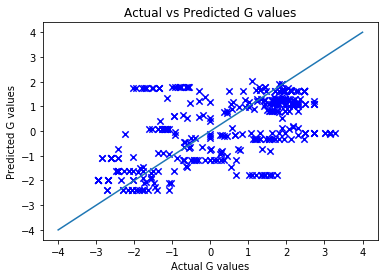

In [142]:
x = np.linspace(-4,4,10)

plt.scatter(total_results['Actual'], total_results['Predicted'], color = 'b', marker = 'x', s = 40)
#plt.xlim(0, 4)
#plt.ylim(-1, 3)
plt.plot(x, x)
plt.title('Actual vs Predicted G values')
plt.xlabel('Actual G values')
plt.ylabel('Predicted G values')
plt.rcParams['figure.figsize'] = [10,10]
plt.show()

In [42]:
def LORO_Lasso():
    scores = pd.DataFrame(columns = ['set', 'MSE', 'MAE', 'r^2'])
    feature_tables = dict()
    for i in range(17): 

        lasso = Lasso(alpha = 0.01, tol = 0.00001)

        Drop = reactions[i]

        X_train = X.drop(Drop)
        Y_train = Y.drop(Drop)
        X_test = Xs[i]
        Y_test = Ys[i]

        lasso.fit(X_train.reset_index().drop(['Reaction'], axis = 1), Y_train.reset_index().drop('Reaction', axis = 1))
        Y_pred = lasso.predict(X_test.reset_index().drop(['Reaction'], axis = 1))

        results = pd.concat([Y_test.reset_index(), pd.DataFrame(Y_pred)], axis = 1)
        results.set_index('Reaction', inplace = True)
        results.columns = ['Actual', 'Predicted']
        
        scores = scores.append({'set': str(i+1),
                    'MSE': mean_squared_error(Y_test, Y_pred),
                    'MAE': mean_absolute_error(Y_test, Y_pred),
                    'r^2': r2_score(Y_test, Y_pred)}, ignore_index = True)

        
    scores.set_index('set', inplace = True)

    return results, scores

In [43]:
total_results, scores = LORO_Lasso()

C:\Users\jlisd\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03004032309470972, tolerance: 0.011164896491813597
  positive)
C:\Users\jlisd\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03380856176335101, tolerance: 0.010124463070410917
  positive)
C:\Users\jlisd\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02616465979266991, tolerance: 0.011434451208835423
  positive)
C:\Users\jlisd\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterat

In [44]:
scores

,MSE,MAE,r^2
set,,,
1,0.129290,0.297851,-0.641777
2,1.276378,1.002311,-0.762408
3,3.038964,1.590984,-11.952373
4,1.148904,1.010533,-4.169844
5,0.481921,0.544807,-1.093925
6,0.725918,0.715165,-0.623065
7,0.912754,0.828019,-1.751928
8,5.878917,2.234052,-11.753629
9,3.697253,1.907424,-43.151210


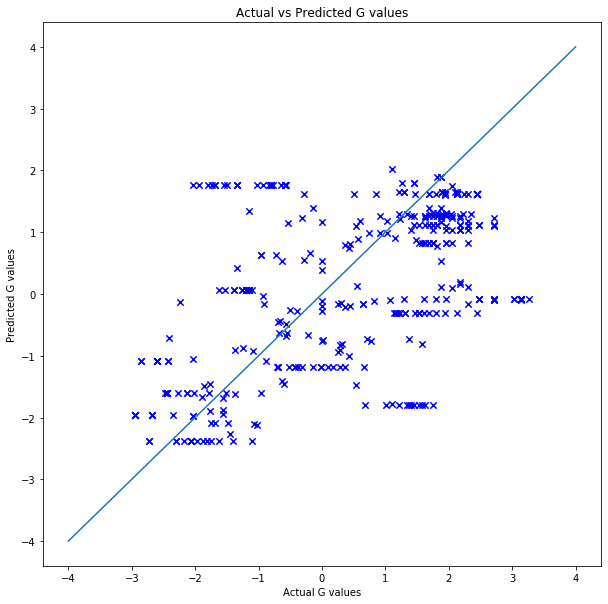

In [146]:
x = np.linspace(-4,4,10)

plt.scatter(total_results['Actual'], total_results['Predicted'], color = 'b', marker = 'x', s = 40)
#plt.xlim(0, 4)
#plt.ylim(-1, 3)
plt.plot(x, x)
plt.title('Actual vs Predicted G values')
plt.xlabel('Actual G values')
plt.ylabel('Predicted G values')
plt.rcParams['figure.figsize'] = [10,10]
plt.show()

In [50]:
forest = RandomForestRegressor(max_depth = 3)

X_train = X8
Y_train = Y8


forest.fit(X_train.reset_index().drop(['Reaction'], axis = 1), Y_train.reset_index().drop('Reaction', axis = 1).values.ravel())
Y_pred = forest.predict(X_train.reset_index().drop(['Reaction'], axis = 1))

results = pd.concat([Y_train.reset_index(), pd.DataFrame(Y_pred)], axis = 1)
results.set_index('Reaction', inplace = True)
results.columns = ['Actual', 'Predicted']
results

,Actual,Predicted
Reaction,,
"Transfer Hydrogenation of b,g-Alkynyl a-Imino Esters Catalyst screening and reaction 1",0.76683,0.665678
"Transfer Hydrogenation of b,g-Alkynyl a-Imino Esters Catalyst screening and reaction 2",0.252449,0.360172
"Transfer Hydrogenation of b,g-Alkynyl a-Imino Esters Catalyst screening and reaction 3",0.715472,0.619118
"Transfer Hydrogenation of b,g-Alkynyl a-Imino Esters Catalyst screening and reaction 4",1.36996,1.124842
"Transfer Hydrogenation of b,g-Alkynyl a-Imino Esters Catalyst screening and reaction 5",0.0118429,0.303927
"Transfer Hydrogenation of b,g-Alkynyl a-Imino Esters Catalyst screening and reaction 6",1.74348,1.995510
"Transfer Hydrogenation of b,g-Alkynyl a-Imino Esters Catalyst screening and reaction 7",1.07488,1.120928
"Transfer Hydrogenation of b,g-Alkynyl a-Imino Esters Catalyst screening and reaction 8",1.5787,1.412034
"Transfer Hydrogenation of b,g-Alkynyl a-Imino Esters Catalyst screening and reaction 9",0.315139,0.377177


In [70]:
forest.feature_importances_
features = pd.concat([pd.DataFrame(X.columns), pd.DataFrame(forest.feature_importances_)], axis = 1)
features.columns = ['Feature', 'Importance']
features.set_index('Feature', inplace = True)
features.sort_values(by = ['Importance'], ascending = False, inplace = True)

for feature in features.index:
    if feature in solvent_columns:
        features.loc[feature, 'type'] = 'solvent'
    elif feature in nucleophile_columns:
        features.loc[feature, 'type'] = 'nucleophile'
    elif feature in catalyst_columns:
        features.loc[feature, 'type'] = 'catalyst'
    elif feature in iminium_columns:
        features.loc[feature, 'type'] = 'iminium'

features = features[['type', 'Importance']]

features.head(25)

,type,Importance
Feature,,
LUMO (iminium),iminium,0.049683
C1 R,catalyst,0.040937
LB1,iminium,0.039053
C4 L,catalyst,0.034805
C5 A,catalyst,0.031443
C1 A,catalyst,0.031398
L6 L,catalyst,0.027109
iPOsy,catalyst,0.025444
b,catalyst,0.025301


In [168]:
7/3
#look through code and try to fix bugs, make sure information are used correctly
#run models 10 times with computer initialized random seed
#try to predict reactions by withholding other, find r^2 of all total
#prepare powerpoint for chemistry collaborator mainly focused on results, importance of features (one with iminium, one without iminium),
#dont use complex terms

2.3333333333333335